

#### Project Description:
    
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do we know if a customer is no longer with you? We can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, we can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: our follower might have gotten bored and left you.
    
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
    
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.
    
#### Project purpose: 
    
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.
    
    
**Instructions for completing the project**
    

**Step 1. Download the data**
    
Model Fitness provided us with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
    
1. 'Churn' — the fact of churn for the month in question

Current dataset fields:
User data for the preceding month
1. 'gender'
    
2. 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
    
3. 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
    
4. Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

5. 'Phone' — whether the user provided their phone number
    
6. 'Age'
    
7. 'Lifetime' — the time (in months) since the customer first came to the gym
    
8. Data from the log of visits and purchases and data on current membership status
    
9. 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
    
10 'Month_to_end_contract' — the months remaining until the contract expires
    
11. 'Group_visits' — whether the user takes part in group sessions
    
12. 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
    
13. 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
    
14. 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.
    
File path: /datasets/gym_churn_us.csv. Download the dataset.
    
**Step 2. Carry out exploratory data analysis (EDA)**
    
1. Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
    
2. Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
    
3. Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
    
4. Build a correlation matrix and display it.
    
**Step 3. Build a model to predict user churn**
    
1. Build a binary classification model for customers where the target feature is the user's leaving next month.
    
2. Divide the data into train and validation sets using the train_test_split() function.
    
3. Train the model on the train set with two methods:
    
- logistic regression
- random forest
    
4. Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
    
5. Remember to indicate the random_state parameter when dividing data and defining the algorithm.

**Step 4. Create user clusters**
    
Set aside the column with data on churn and identify object (user) clusters:

1. Standardize the data.
    
2. Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
    
3. Look at the mean feature values for clusters. Does anything catch your eye?
    
4. Plot distributions of features for the clusters. Do you notice anything?
    
5. Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
    
    
    
    
    
    
**Step 5. Come up with conclusions and basic recommendations on working with customers**
    

    
- Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import warnings
import math
from scipy import stats
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans



### Step 1. Download the data

In [2]:
LOCAL_PATH_1 = 'gym_churn_us.csv'
PLATFORM_PATH_1 = '/datasets/gym_churn_us.csv'
#------------------------------------------------------
try:
    gym_churn = pd.read_csv(LOCAL_PATH_1)
except:
    gym_churn = pd.read_csv(PLATFORM_PATH_1)
#------------------------------------------------------
display(gym_churn.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
display(gym_churn.info())
display(gym_churn.isnull().sum())

#checking duplicates in dataframe
print('duplicate rows:',gym_churn.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

duplicate rows: 0




* Conclusion:
    
1. In the beginning, the datasets have been opened and the general information have been analyzed .
2. The data set has 4000 rows, 14 columns. 
3. There have no missing values and duplicated row were observed.

In [4]:
# Data Preprocessing

#making the column names in lowecase
gym_churn.columns = gym_churn.columns.str.lower()

#Changing column names
gym_churn.rename(columns = {'partner':'partner_company_benefit','phone':'number_provided','group_visits':'group_sessions_taken'}, inplace = True)
display(gym_churn.head())

,gender,near_location,partner_company_benefit,promo_friends,number_provided,contract_period,group_sessions_taken,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0




* Conclusion:
    
1. Column names have been converted to lower case.
2. partner, phone, group_visits column names have been changed to understand the column name well.



### Step 2. Carry out exploratory data analysis (EDA)

 ### 1. Study the mean values and standard deviation (use the describe() method).

In [5]:
display(gym_churn.describe())

,gender,near_location,partner_company_benefit,promo_friends,number_provided,contract_period,group_sessions_taken,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000




* Conclusion:
    
1. In the gender, near_location,partner_company_benefit,promo_friends,number_provided and churn column have binary values like '0' or '1'. '0' means 'no' and '1' means yes.In gender column, '0' means female and '1' means 'male'.
2. Datasets shows that number of males are higher than female.And 80% people live/work near gym.
3. Almost 50% percent people have partner company benfits and 30% people have promo offer.
4. Approx. 90% people provided thier number and 40% people take group session.
5. Average age is 29 years and the average number of months a customer has had a gym contract is almost 4.5 months.


### 2. Look at the mean feature values in two groups: for those who left and for those who stayed.

In [6]:
gym_churn_grouped = gym_churn.pivot_table(index = 'churn', aggfunc='mean').reset_index()
display(gym_churn_grouped)

,churn,age,avg_additional_charges_total,avg_class_frequency_current_month,avg_class_frequency_total,contract_period,gender,group_sessions_taken,lifetime,month_to_end_contract,near_location,number_provided,partner_company_benefit,promo_friends
0,0,29.976523,158.445715,2.027882,2.024876,5.747193,0.510037,0.464103,4.711807,5.283089,0.873086,0.903709,0.534195,0.353522
1,1,26.989632,115.082899,1.044546,1.474995,1.728558,0.510839,0.268615,0.990575,1.662582,0.768143,0.902922,0.355325,0.183789




* Conclusion:
    
1. Average age 27 years people have been stayed and average age 30 years old people have been left.
2. Equal amount of male and female customers decide to renew or not renew.
3. It shows that most of the people who do not renew do not live near a gym location, were not employees of a partner company ,were not given a promotional code by a friend and didn't take group session.
4. The people who decided to leave the gym have average contract approx. 1.6 months.

### 2. Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [7]:
gym_churn_copy = gym_churn.copy()

In [8]:
#---------------------------------------------------------------------------
#changing the churn column interger type to string type
gym_churn_copy['churn'] = gym_churn_copy['churn'].astype(str)

def churn_condition(value):
    ''' this function converts churn binary values to strings value. '''
    if value == '1':
        return 'leave'
    if value == '0':
        return 'stay'

gym_churn_copy['churn']= gym_churn_copy['churn'].apply(churn_condition)



#changing the gender column interger type to string type
gym_churn_copy['gender'] = gym_churn_copy['gender'].astype(str)

def gender(value):
    ''' this function converts gender binary values to strings value. '''
    if value == '0':
        return 'female'
    if value == '1':
        return 'male'

gym_churn_copy['gender'] = gym_churn_copy['gender'].apply(gender)

#------------------------------------------------------------------

#changing the near location column interger type to string type
gym_churn_copy['near_location'] = gym_churn_copy['near_location'].astype(str)

def location(value):
    ''' this function converts near_location binary values to strings value. '''
    if value == '0':
        return 'no'
    if value == '1':
        return 'yes'

gym_churn_copy['near_location'] = gym_churn_copy['near_location'].apply(location)

#----------------------------------------------------------------
#changing the partner_company_benefit column interger type to string type
gym_churn_copy['partner_company_benefit'] = gym_churn_copy['partner_company_benefit'].astype(str)

def partner_benefit(value):
    ''' this function converts partner_benefits binary values to strings value. '''
    if value == '0':
        return 'no'
    if value == '1':
        return 'yes'

gym_churn_copy['partner_company_benefit'] = gym_churn_copy['partner_company_benefit'].apply(partner_benefit)


#--------------------------------------------------------------------------
#changing the partner_company_benefit column interger type to string type
gym_churn_copy['promo_friends'] = gym_churn_copy['promo_friends'].astype(str)

def promo_friend(value):
    ''' this function converts promo_friend binary values to strings value. '''
    if value == '0':
        return 'no'
    if value == '1':
        return 'yes'

gym_churn_copy['promo_friends'] = gym_churn_copy['promo_friends'].apply(promo_friend)

#-------------------------------------------------------------------

#changing the number_provided column interger type to string type
gym_churn_copy['number_provided'] = gym_churn_copy['number_provided'].astype(str)

def number(value):
    ''' this function converts phone_number_provided  binary values to strings value. '''
    if value == '0':
        return 'no'
    if value == '1':
        return 'yes'

gym_churn_copy['number_provided'] = gym_churn_copy['number_provided'].apply(number)

#---------------------------------------------------------------------

#changing the number_provided column interger type to string type
gym_churn_copy['group_sessions_taken'] = gym_churn_copy['group_sessions_taken'].astype(str)

def group_sessions(value):
    ''' this function converts group session binary values to strings value. '''
    if value == '0':
        return 'no'
    if value == '1':
        return 'yes'

gym_churn_copy['group_sessions_taken'] = gym_churn_copy['group_sessions_taken'].apply(group_sessions)

display(gym_churn_copy.head())


,gender,near_location,partner_company_benefit,promo_friends,number_provided,contract_period,group_sessions_taken,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,male,yes,yes,yes,no,6,yes,29,14.227470,5.0,3,0.020398,0.000000,stay
1,female,yes,no,no,yes,12,yes,31,113.202938,12.0,7,1.922936,1.910244,stay
2,female,yes,yes,no,yes,1,no,28,129.448479,1.0,2,1.859098,1.736502,stay
3,female,yes,yes,yes,yes,12,yes,33,62.669863,12.0,2,3.205633,3.357215,stay
4,male,yes,yes,yes,yes,1,no,26,198.362265,1.0,3,1.113884,1.120078,stay




* Conclusion:
    
gender, location, partner_benefit, promo_friend, number, group_sessions,churn_condition functions have been written to convert the binary value to sring value.


In [9]:
#group categorical variables

data = gym_churn_copy[['gender','near_location','partner_company_benefit','promo_friends','number_provided',
                      'group_sessions_taken','churn']]
display(data.head())

,gender,near_location,partner_company_benefit,promo_friends,number_provided,group_sessions_taken,churn
0,male,yes,yes,yes,no,yes,stay
1,female,yes,no,no,yes,yes,stay
2,female,yes,yes,no,yes,no,stay
3,female,yes,yes,yes,yes,yes,stay
4,male,yes,yes,yes,yes,no,stay


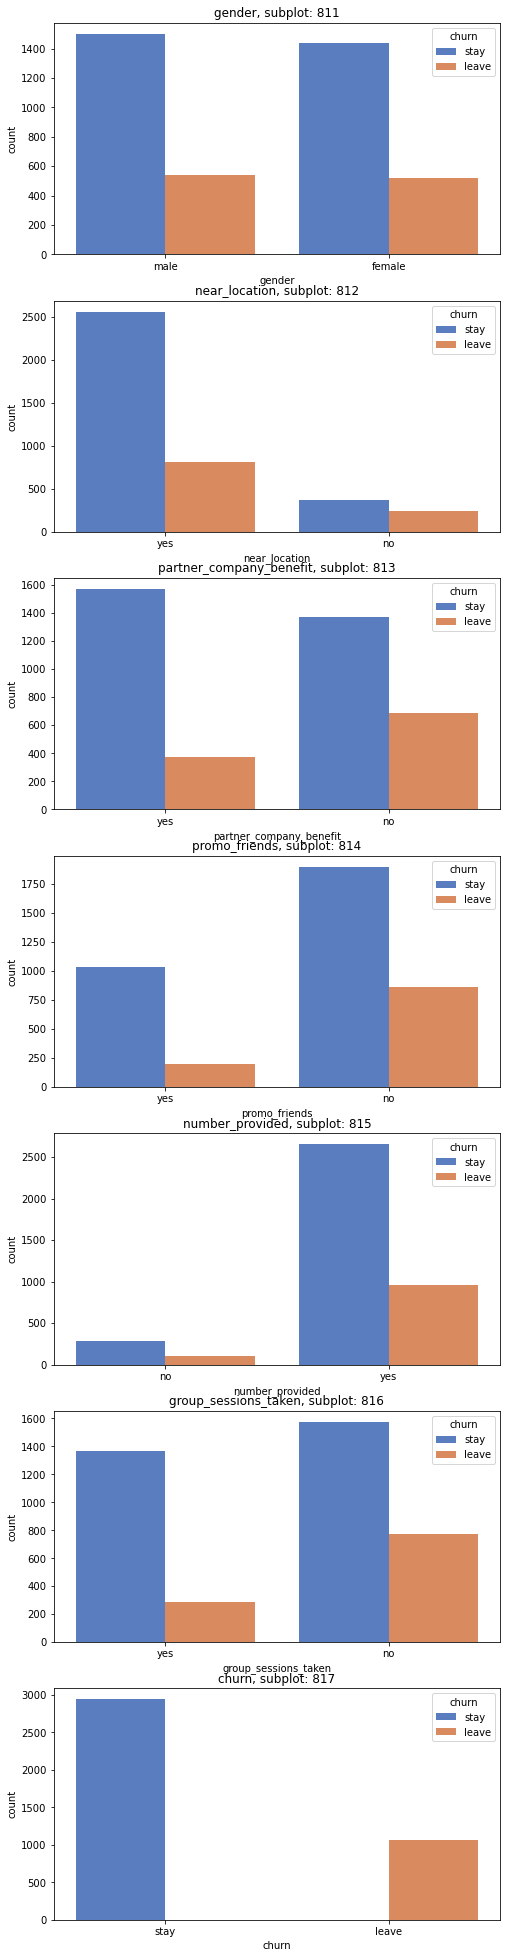

In [10]:
a = 8  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(8,40))
for value in data:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(value, a, b, c))
    plt.xlabel(value)
    sns.countplot(x=value,data=data,hue='churn', palette="muted")
    c = c + 1

plt.show()



* Conclusion:
    
1. Categorical and numerical variabels have been seperated into two datasets,like data and data_2.
2. For gender,  the graph indicates that there is no influence of churning for gender.Both shows same results.
3. For near location, it is clear that people live/work near gym shows less chance to leave the gym than people dont live/work near gym.
    
4. People have more tendency to churn gym who dont have company partner benefits.
    
5. Customer's take group session and have promo_friends offer have less chance to leave gym than who doesn't have.
    
6. This project comes with datasets that shows  4000 customer behavior where 2939 people already leave.Only have 1061 active customers. 

In [11]:
#group numerical variables

data_2 = gym_churn_copy[['age','avg_additional_charges_total','month_to_end_contract','lifetime',
                         'avg_class_frequency_total','avg_class_frequency_current_month','churn']]
display(data_2.head())

,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,29,14.227470,5.0,3,0.020398,0.000000,stay
1,31,113.202938,12.0,7,1.922936,1.910244,stay
2,28,129.448479,1.0,2,1.859098,1.736502,stay
3,33,62.669863,12.0,2,3.205633,3.357215,stay
4,26,198.362265,1.0,3,1.113884,1.120078,stay


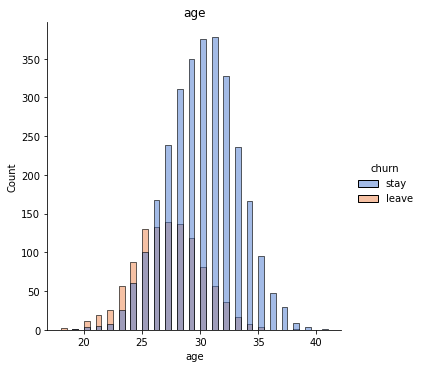

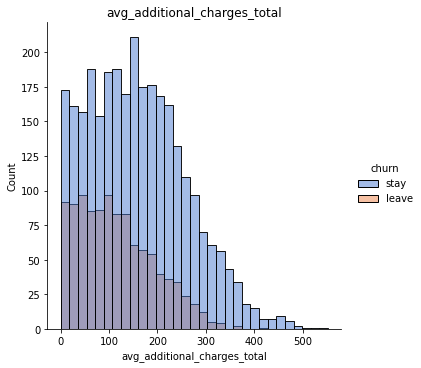

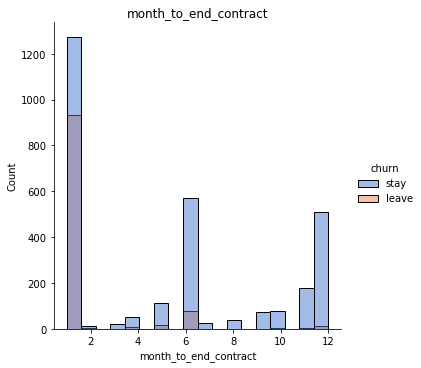

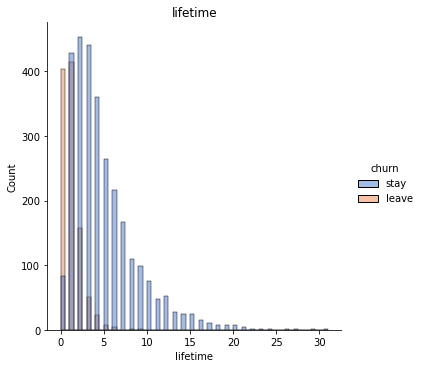

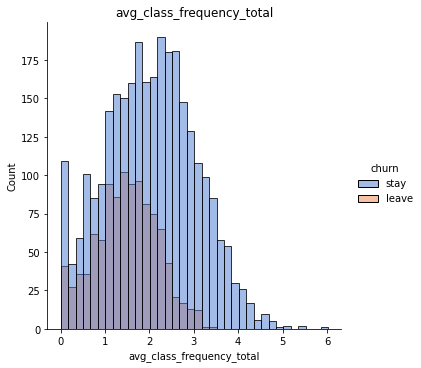

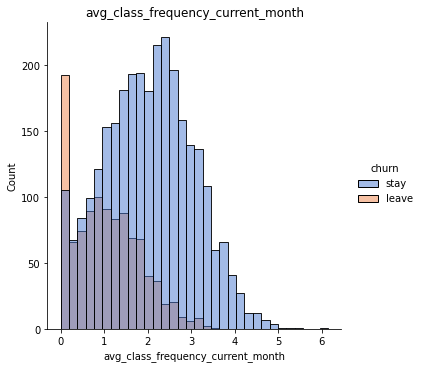

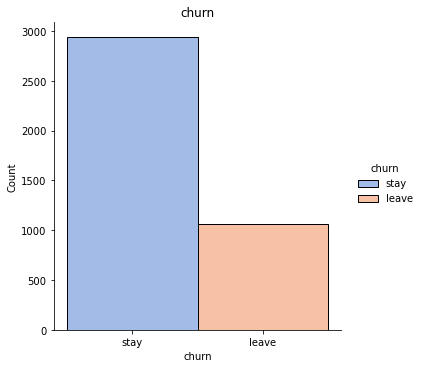

In [12]:
for value in data_2:
    sns.displot(x=value,data=data_2,palette="muted", hue='churn')
    plt.title('{}'.format(value))
    plt.xlabel(value)
    plt.show()




* Conclusion:
    
1. For age, it shows that younger customers (between the ages of 20 and 25) tended to churn. After the age of 25, customers tended not to churn.
2.  It shows that customers who churned did not end up spending a lot of money on additional services, while customers who did not churn did spend a considerable amount more on other gym services.
3.  The customers who churn, most of them did not renew membership after 1 month.But who didn't churn, they renew their membership.
    
4. Within 1 month, most people left gym who had tendency to leave the gym.But it is clear that most of the sign up membership for 3 months, it is most popular plan of the gym.
    
5. Most of the people who had tendency to churn used to come 1-2 days, but who didn't come they have 2-3 days.May be they are more motivated about fitness.
    
6. This current month shows people who churn this month/contract end didn't come many of the them.May be they are not motivated or move other places.But the people who didn't churn, they used to come 2-3 days in a week.

### 3. Build a correlation matrix and display it.

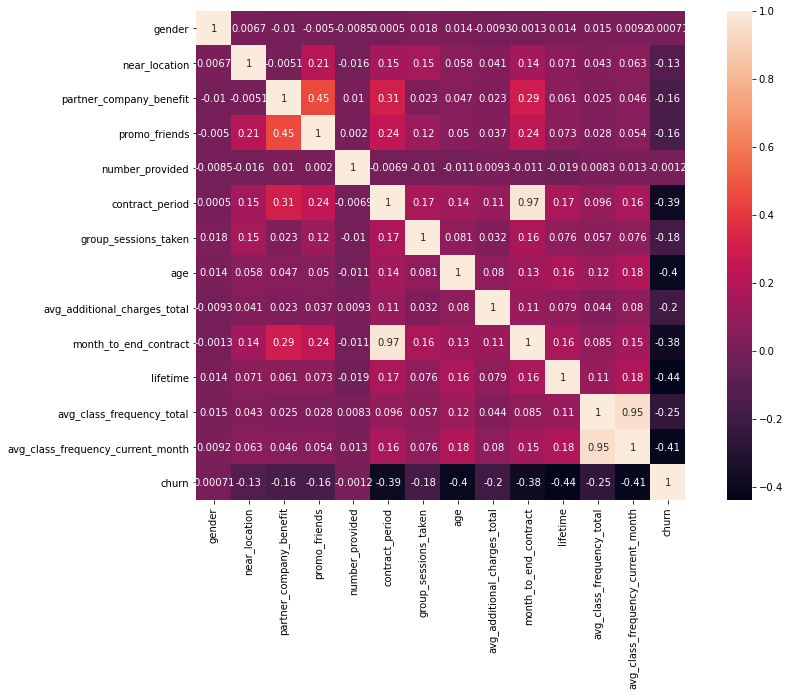

In [13]:
cm = gym_churn.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, square=True)
plt.show()



* Conclusion:
    
Positive correlation have been found between contract_period and month_to_end_contract and avg_class_frequency_current_month with avg_class_frequency_total.And negative correlation have been clearly observed between churn and all other features in this dataset.


    
### Step 3. Build a model to predict user churn

In [14]:
# features (X matrix)
X = gym_churn.drop(['churn'], axis=1)

# target variable (y)
y = gym_churn['churn']

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# Create scaler object and apply it to train set
scaler = StandardScaler()

# Train scaler and transform the matric for train set
X_train_st = scaler.fit_transform(X_train)

# apply standardization of feature matric for test set
X_test_st = scaler.transform(X_test)

# define the models to compare
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# function that predicts model by taking data as input and outputting metrics
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: ', model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\n')

# output metric for both models
for i in models:
    make_prediction(i, X_train, y_train, X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  LogisticRegression(random_state=0)
Accuracy: 0.92
Precision: 0.87
Recall: 0.80


Model:  RandomForestClassifier(random_state=0)
Accuracy: 0.92
Precision: 0.88
Recall: 0.83






* Conclusion:
    
Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
    
Considering all the fact of this three perfomance parameter test results, the RandomForestClassifier model gave better results.


    
### Step 4. Create user clusters

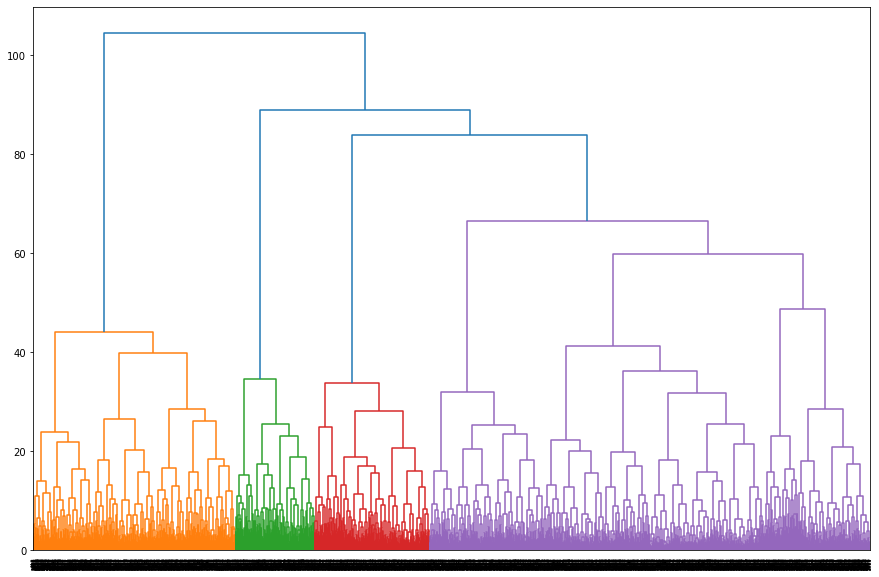

In [15]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Build a matrix of distances based on the standardized feature matrix
linked = linkage(x_sc, method='ward')

# Plot a dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()


In [16]:
# Train the clustering model with the K-means algorithm and predict customer clusters. 
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)


# Look at the mean feature values for clusters
gym_churn['cluster'] = labels

cluster_data = gym_churn.groupby('cluster').mean()
display(cluster_data)

,gender,near_location,partner_company_benefit,promo_friends,number_provided,contract_period,group_sessions_taken,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019




* Conclusion:
    
1.  The dendrogram for this data has suggested that the optimal number of clusters is 5.
2.  Cluster 1 contains users who don't have phone number and cluster 2 contains user not live/work near gym.
3.  The highest churn mean value is cluster 3 where all users live near a gym location: this cluster user have been provided the number.This cluster also had the smallest   total contract length 1-2 month contract churn.They also pay average low additional charges comparing others. 
4. The clusters with the smallest churn are 0 and 4: gender is split equally, most users live near a gym, almost all phone number exist and they spend the most on additional gym services.They also pertipate highest number of group session.

In [17]:
#Plot distributions of features for the clusters for catefgorical variable

gym_churn_copy['cluster'] = labels
data_3 = gym_churn_copy[['gender','near_location','partner_company_benefit','promo_friends','number_provided',
                      'group_sessions_taken','churn','cluster']]

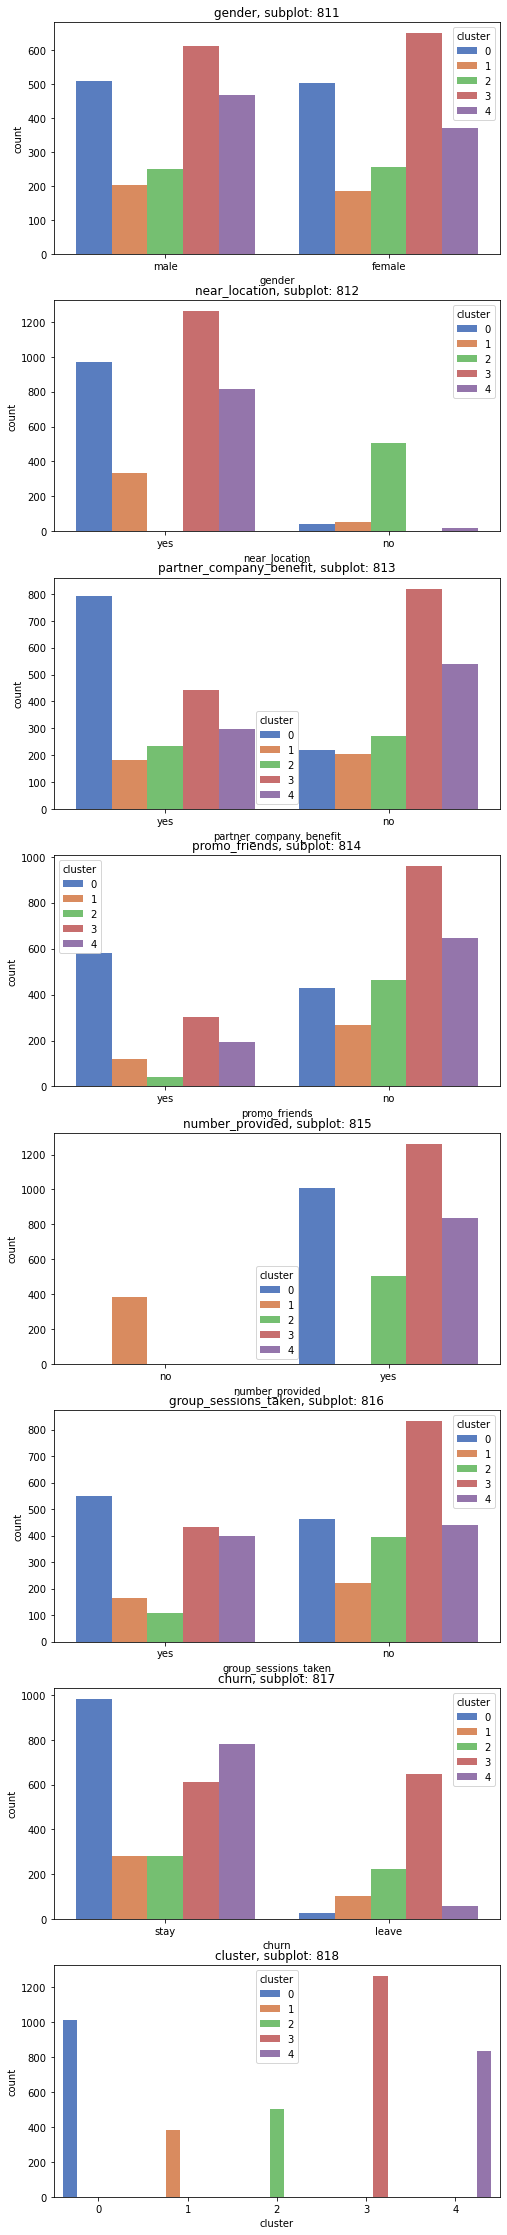

In [18]:
a = 8  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(8,40))
for value in data_3:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(value, a, b, c))
    plt.xlabel(value)
    sns.countplot(x=value,data=data_3,hue='cluster', palette="muted")
    c = c + 1

plt.show()


* Conclusion:
    
1. For gender, it shows an equal amount of male and female in each cluster.
2. For near_location, it shows that cluster 3 are  customers who did not live near a location.
3. For employer_partner, it shows that cluster 0 are the customers who are empoyees of a partner company, while cluster 3 are the ones who are not employees of a partner company.
4. For friend_promo, it shows that cluster 0 are the customers who received a promotional code from their friend, while cluster 3 are not.
5. For number provided,it seems that cluster 1 user didnot provided number.
6. For group_sessions, it shows that cluster 4 mainly did not attend group sessions and cluster 0 did mostly attend group sessions.

In [19]:
#Plot distributions of features for the clusters for numberical variable
data_4 = gym_churn[['age','avg_additional_charges_total','month_to_end_contract','lifetime',
                         'avg_class_frequency_total','avg_class_frequency_current_month','churn','cluster']]


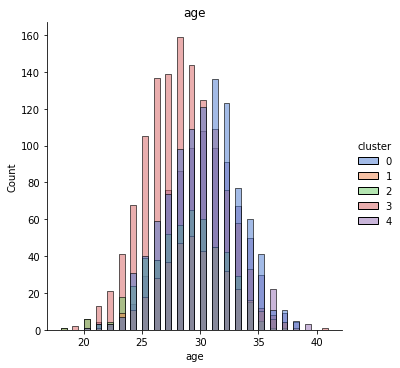

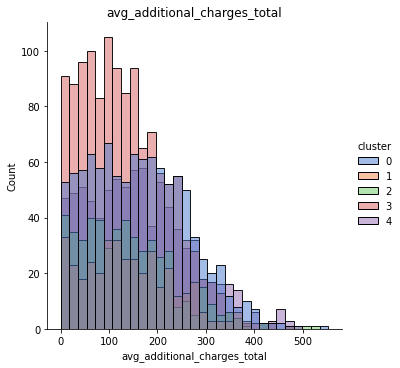

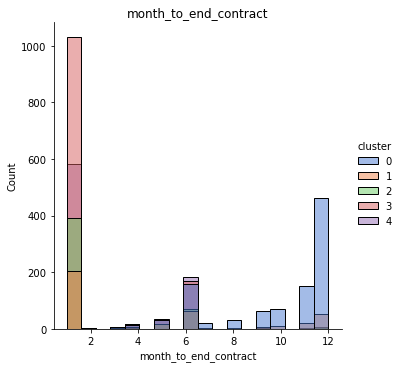

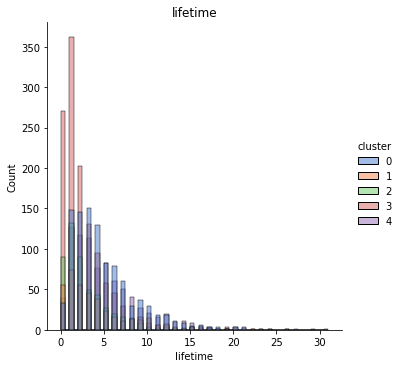

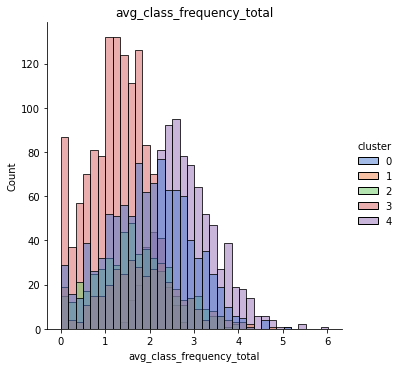

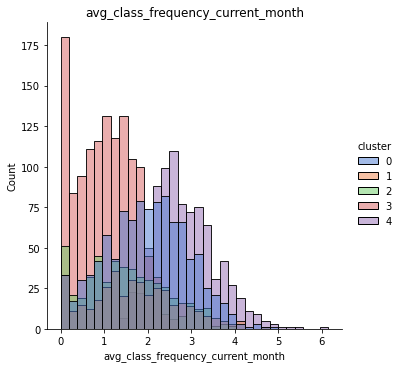

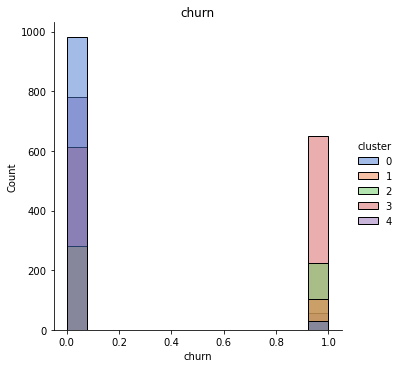

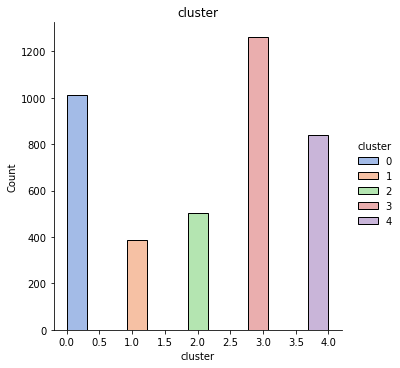

In [20]:
for value in data_4:
    sns.displot(x=value,data=data_4,palette="muted", hue='cluster')
    plt.title('{}'.format(value))
    plt.xlabel(value)
    plt.show()
    



* Conclusion:

1. For age variable: cluster 3 has the youngest population of cluters and cluster 0 have the highest.

2. For avg_additional_charges_total:Clusters 4 and 0 show that they have spent more money than other cluster.
    
3. For month_to_end_contract: cluster 3 are the groups who churn between 1-2 months and cluster 0 are the staying group.

4. For lifetime_months,cluster 3 spent the least amount of months being a member to the gym.

5. For avg_class_per_week_total, cluster 3 visited the gym the least amount of times when compared to other cluster.

6. For avg_visits_per_week_last_month, again cluster 3 visited the gym the least amount of times when compared to cluster 0 which visited about twice/thrice weekly, cluster 4 visited more than twice weekly and clusters 1 and 2 visited about once a week.

### Calculate the churn rate for each cluster

In [21]:
churn_pivot = gym_churn.pivot_table(index = 'cluster',values='churn',aggfunc=['sum','count']).reset_index()
churn_pivot.columns=['cluster','sum of churn','no of churn']
churn_pivot['churn_rate %']=(churn_pivot['sum of churn']/churn_pivot['no of churn'])*100
display(churn_pivot)

,cluster,sum of churn,no of churn,churn_rate %
0,0,28,1010,2.772277
1,1,103,385,26.753247
2,2,224,505,44.356436
3,3,649,1262,51.426307
4,4,57,838,6.801909



* Conclusion:
    
From churn rate percentage, it is clear that cluster 0 and cluster 4 have higher churn rate, whereas cluster 3 and 2 have higher staying rate.



### Step 5. Come up with conclusions and basic recommendations on working with customers


To improve their customer retention strategy, I would suggest the following recommendation:

1. The customer lies between cluster 0 and 4 have similar characteristics like both cluster people don't live/work near location and they don't have company benefits too.So , For acquiring new customers, focus on customers that live near a gym location, that are employees at a partner company and that are between the ages of 27 and 34 years and comes in the gym atleast twice in a week. The data shows that customers who fall under one or (ideally) all of these categories are less likely to churn.

2. For already customers, phone numbers and emails could be updated.And e-marketing with lucrative offers like summer deal,health/ fitness tips could be offered to motivate them not churn early.Specially the customers on cluster 3, who did churn within the 1-2 months should be targeted with higher priority.

3. The marketing is the key to bring new customer.Few booth with recent offers could be placed in the city center.In this corona pandemic, people have more tendency to churn gym not to infected by covid.So keep them motivated and stick with membership, zoom cardio sessions could be implemented on regular basis.